# Analiza letalskih nesreč zadnij stotih let
Najprej si poglejmo glavno tabelo zajetih podatkov. Ta vklučuje informacije od prve zabeležene letalske nesreče v zgodovini pa do zadnje leta 2018.

In [1]:
import pandas as pd
nesreče = pd.read_csv('vsi.csv')
pd.options.display.max_rows = 20
nesreče

,datum,kraj,družbe,model,registracija,žrtve/potniki(na tleh)
0,17 Sep 1908,"Fort Myer, Virginia",Military - U.S. Army,Wright Flyer III,?,1/2(0)
1,07 Sep 1909,"Juvisy-sur-Orge, France",?,Wright Byplane,SC1,1/1(0)
2,12 Jul 1912,"Atlantic City, New Jersey",Military - U.S. Navy,Dirigible,?,5/5(0)
3,06 Aug 1913,"Victoria, British Columbia, Canada",Private,Curtiss seaplane,?,1/1(0)
4,09 Sep 1913,Over the North Sea,Military - German Navy,Zeppelin L-1 (airship),?,14/20(0)
...,...,...,...,...,...,...
4899,10 Jul 2018,"Pretoria, South Africa",Rovos Air,Convair CV-340,ZS-BRV,1/19(1)
4900,04 Aug 2018,"Flims, Switzerland",Ju Air,Junkers JU-52,HB-HOT,20/20(1)
4901,28 Sep 2018,"Chuuk, Micronesia",Air Niugini,Boeing 737-8BK,P2-PXE,1/47(0)
4902,29 Oct 2018,"Off Jakarta, Indonesia",Lion Air,Boeing 737-MAX 8,PK-LQP,189/189(0)


S pomožno tabelo umrlih in potnikov si oglejmo nekaj zanimivih dejstev.

In [2]:
umrli_lepo = pd.read_csv("brez_tal.csv")
umrli_lepo.sum() #dobimo stevilo vseh umrlih in potnikov na pripadajočih letih 

stevilo mrtvih    109625
potniki           152419
dtype: int64

In [3]:
str(umrli_lepo["potniki"].sum() - umrli_lepo["stevilo mrtvih"].sum())+ " preživelih" #preživeli

'42794 preživelih'

In [4]:
#povprečen odstotek umrlih
povprečje = round((umrli_lepo["stevilo mrtvih"] / umrli_lepo["potniki"]*100).mean())
str(povprečje) + " %"

'82 %'

In [7]:
#pogledamo najhujše nesreče v zgodovini
vse_umrli = nesreče.drop(["žrtve/potniki(na tleh)"], axis = 1).merge(umrli_lepo,left_index=True, right_index=True)
vse_umrli.sort_values(["stevilo mrtvih"], ascending = False).head(10)

,datum,kraj,družbe,model,registracija,stevilo mrtvih,potniki
2831,27 Mar 1977,"Tenerife, Canary Islands",Pan American World Airways / KLM,Boeing B-747-121 / Boeing B-747-206B,N736PA/PH-BUF,583,644
3270,12 Aug 1985,"Mt. Osutaka, near Ueno Village, Japan",Japan Air Lines,Boeing B-747-SR46,JA8119,520,524
3985,12 Nov 1996,"Near Charkhi Dadri, India",Saudi Arabian Airlines / Kazakhstan Airlines,Boeing B-747-168B / Ilyushin IL-76TD,HZ-AIH/UN-76435,349,349
2666,03 Mar 1974,"Near Ermenonville, France",Turkish Airlines (THY),McDonnell Douglas DC-10-10,TC-JAV,346,346
3266,23 Jun 1985,"Atlantic Ocean, 110 miles West of Ireland",Air India,Boeing B-747-237B,VT-EFO,329,329
3022,19 Aug 1980,"Riyadh, Saudi Arabia",Saudi Arabian Airlines,Lockheed 1011-200 TriStar,HZ-AHK,301,301
4822,17 Jul 2014,"Hrabove, Ukraine",Malaysia Airlines,Boeing 777-2H6ER,9M-MRD,298,298
3428,03 Jul 1988,"Over the Persian Gulf, near Bandar Abbas, Iran",Iran Air,Airbus A300B2-203,EP-IBU,290,290
4361,19 Feb 2003,"Near Shahdad, Iran",Military - Islamic Revolution's Guards Corps,Ilyushin Il-76MD,15-22,275,275
2953,25 May 1979,"Chicago O'Hare, Illinois",American Airlines,McDonnell Douglas DC-10-10,N110AA,271,271


Poglejmo si še najbolj "srečno" nesrečo. Tu se osredotočimo na tisto nesrečo v kateri je umrl vsaj en človek, a je bilo razmerje umrlih z ostalimi potniki najmanjše.

In [8]:
vsaj_en = vse_umrli[vse_umrli["stevilo mrtvih"] >= 1]
((vsaj_en["stevilo mrtvih"] / vsaj_en["potniki"]) * 100).sort_values().head(5)

4147    0.193424
4053    0.254453
2662    0.335570
4201    0.335570
3863    0.341297
dtype: float64

In [9]:
# pogledamo kateri let se skriva za id-jem
vsaj_en.loc[[4147]]

,datum,kraj,družbe,model,registracija,stevilo mrtvih,potniki
4147,23 Jul 1999,"Tokyo, Japan",All Nippon Airways,Boeing B-747,JA8966,1,517


V mnogih delih sveta ljudje vidijo petek trinajsti kot nesrečen datum. Ali ta strah drži kaj vode? Preverimo koliko nesreč se je zgodilo ravno takrat.

In [10]:
#uvozimo datotekov vseh petkov trinajstih zadnij 100 let
petek = pd.read_csv("petek_13.csv") 
#pogledamo, kje se te datumi ujemajo z nesrečami
presek = pd.merge(left=nesreče,right=petek, left_on='datum', right_on='datum')
#pogledamo število 
str(len(presek)) + " ujemanj"

'19 ujemanj'

Z malo brskanja po internetu ugotovimo, da je od prve zabeležene nesreče pa do zadnje minilo 40227 dni. V tem času je bilo zabeleženih 4904 nesreč. Kvocient številk nam pove, da je verjetnost da se na poljuben dan zgodi nesreča približno 12%. Če pomnožimo to število s številom vseh petkov trinajstih v tem času vidimo, da je statistično pričakovana številka nesreč 20, kar se ujema z dobljenim rezultatom. Lahko zaključimo, da je strah (vsaj z vidika letalskih nesreč) iracionalen.

Nad izidom smo precej razočarani, zato posežemo v druge kulture. Na Kitajskem obstaja strah pred številko štiri. Ja ta kaj bolj utemeljen?

In [11]:
#uvozimo tabelo vseh 4. aprilov od leta 1920
kitajci = pd.read_csv("kitajci.csv")
#pogledamo ujemanja
presek_2 = pd.merge(left=nesreče,right=kitajci, left_on='datum', right_on='datum')
str(len(presek_2)) + " ujemanj"

'18 ujemanj'

Po prej opisanem postpku ugotovimo, da je pričakovana številka 13, torej hipoteze še ne moremo ovreči.

Osredotočimo se še na države kjer so se zgodile nesreče.

In [24]:
# uvozimo datoteko, ki vsebuje samo države nesreč
države = pd.read_csv("samo_države.csv")
#države damo v grupo
države_grupirano = države.groupby("država")
#pogledamo, kje se je zgodilo največ nesreč
vrh = države_grupirano.size().sort_values(ascending = False).head(20)
vrh

država
United States of America    880
Russia                      252
Brazil                      171
Colombia                    148
France                      125
Canada                      122
England                     101
India                       100
Indonesia                    97
China                        94
Italy                        85
Mexico                       80
Germany                      77
Philippines                  70
USSR                         67
Australia                    63
Spain                        58
Venezuela                    53
Peru                         53
Bolivia                      46
dtype: int64

Rezultat ni presenetljiv saj se ujema z gostoto letalskega prometa držav.

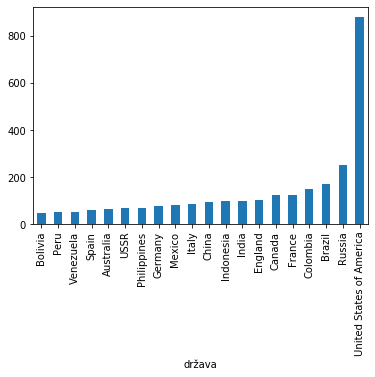

In [23]:
#izdelamo stolpični diagram
%matplotlib inline
države_grupirano.size().sort_values().tail(20).plot.bar()

Poglejmo še v katerih državah ni bilo nesreč.

In [19]:
pd.options.display.max_rows = None
#uvozimo datoteko z vsemi državami sveta
države_sveta = pd.read_csv("svet.csv")
#izločimo države v katerih se je zgodila nesreča
države_sveta[~države_sveta.Država.isin(države.država)].dropna()

,Država
3,American Samoa
4,Andorra
6,Anguilla
11,Aruba
19,Belarus
21,Belize
28,Bouvet Island
30,British Indian Ocean Territory
33,Burkina Faso
34,Burundi


Morda nas države kot so Črna Gora, Srbija ali pa Belorusija na prvi hip presenetijo, ampak gre seveda za ozemlja, ki so bila še nedavno del večje državne tvorbe (Jugoslavija, Sovijetska Zveza).

Katere letalske družbe so odgovorne za največ nesreč?

In [21]:
#uvozimo datoteko z družbami
družbe = pd.read_csv("družba.csv")
#grupiramo po družbah
družbe_grupirano = družbe.groupby("družba")
#pogledamo ekstreme
družbe_grupirano.size().sort_values(ascending = False).head(20)

družba
Aeroflot                               253
Military - U.S. Air Force              138
Air France                              72
Deutsche Lufthansa                      63
Military - U.S. Army Air Forces         43
China National Aviation Corporation     43
Pan American World Airways              40
United Air Lines                        40
US Aerial Mail Service                  35
American Airlines                       35
KLM Royal Dutch Airlines                34
Indian Airlines                         33
Philippine Air Lines                    33
Military - Royal Air Force              32
Private                                 29
British Overseas Airways                28
Military - U.S. Navy                    28
Military - U.S. Army                    27
Northwest Orient Airlines               25
Aeropostale                             24
dtype: int64

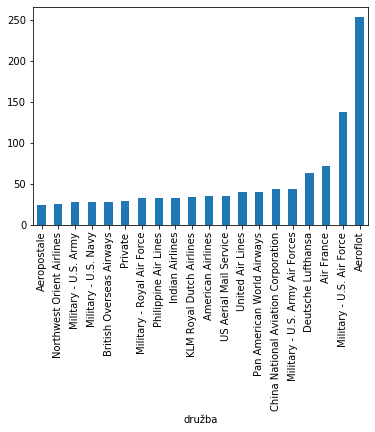

In [22]:
#izdelamo diagram
%matplotlib inline
družbe_grupirano.size().sort_values().tail(20).plot.bar()

Ali število nesreč pada z leti?

In [25]:
#uvozimo datoteko samo z leti
leta = pd.read_csv("leto.csv")
#ustvarimo grupo let
leta_grupirano = leta.groupby("leto")
#pogledamo maksimume
največ = leta_grupirano.size().sort_values(ascending = False).head(10)
največ

leto
1946    88
1989    83
1947    82
1962    78
1948    77
1972    77
1951    75
1945    74
1994    74
1970    73
dtype: int64

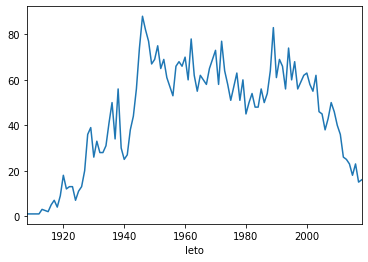

In [26]:
#ustvarimo diagram
leta_grupirano.size().plot()

Klujb nekolikšnemu dvigu začetka devedesetih vidimo, da je število nesreč v zadnjih desetih letih močno padlo.

Ali letala skozi čas postajajo bolj varna? Poglejmo če povprečno razmerje umrlih potnikov z vsemi pada.

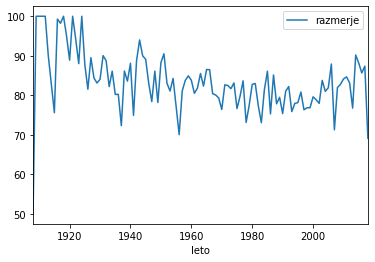

In [27]:
#združimo datoteko, ki vsebuje samo leta nesreč z tisto, ki vsebuje žrtve in potnike
oba = leta.merge(umrli_lepo,left_index=True, right_index=True)
#dodamo stolpec razmerja umrlih z vsemi potniki v procentih
oba["razmerje"] = oba["stevilo mrtvih"] / oba["potniki"] * 100
#izpustimo zdaj nepotrebna stolpca, saj rabimo samo razmerje
razmerje = oba.drop(["stevilo mrtvih", "potniki"], axis = 1)
#grupiramo po letu
oba_grupirano = razmerje.groupby("leto")
#prikažemo graf povprečja za vsako leto
oba_grupirano.mean().plot()

Vidimo da povprečje skozi čas ostaja precej visoko.

V katerih mesecih so nesreče najpogostejše?

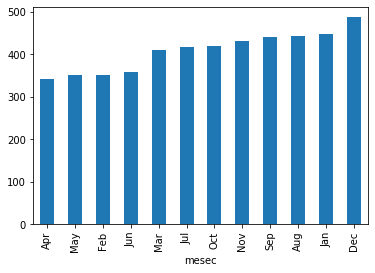

In [30]:
#uvozimo datoteko samo z meseci
meseci = pd.read_csv("mesec.csv")
#ustvarimo grupo mesecev
meseci_grupirano = meseci.groupby("mesec")
#pogledamo maksimume
največ = meseci_grupirano.size().sort_values().plot.bar()

Tradicionalno sta [Avgust in Julij](https://www.airport-technology.com/news/busiest-day-for-air-travel/) poleg Decembra meseca, ko z letalom potuje največ ljudi. Se ta statistika odraža tudi v letih, ko je prišlo do nesreče? 

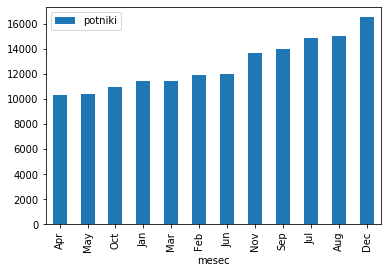

In [31]:
#združimo tabelo potnikov in mescev
skupaj_potniki_mesec = meseci.merge(umrli_lepo.potniki,left_index=True, right_index=True)
#grupa mesecev
skupaj_potniki_mesec_grup = skupaj_potniki_mesec.groupby("mesec")
#graf števila potnikov vsak mesec
skupaj_potniki_mesec_grup.sum().sort_values("potniki").plot.bar()

Opazimo podoben trend tudi pri letih pri katerih je prišlo do nesreče.